<a href="https://colab.research.google.com/github/OMIDUFMG2019/Algorithmic-trading/blob/master/Copy_of_Copy_of_Copy_of_Untitled80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip3 install -U git+https://github.com/PYFTS/pyFTS


  Cloning https://github.com/PYFTS/pyFTS to /tmp/pip-req-build-jondp5aw
  Running command git clone -q https://github.com/PYFTS/pyFTS /tmp/pip-req-build-jondp5aw
  Created wheel for pyFTS: filename=pyFTS-1.6-cp36-none-any.whl size=207415 sha256=7e39cf76262a5cf946e4a055bfc9d985f2233db31dab64466bd1573d092b96b3
  Stored in directory: /tmp/pip-ephem-wheel-cache-z_lzzd8_/wheels/e7/32/a9/230470113df5a73242a5a6d05671cb646db97abf14bbce2644
Successfully built pyFTS


In [0]:
# importing necessary libraries .
from pyFTS.fcm import Activations
import numpy as np
import os
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

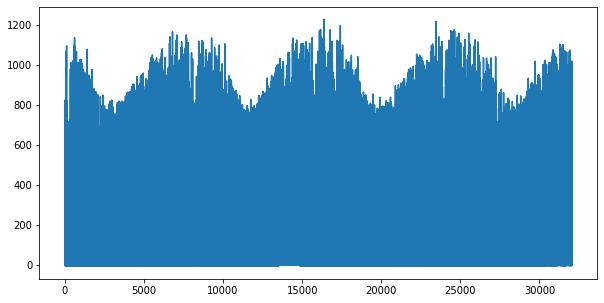

In [4]:
df = pd.read_csv('https://query.data.world/s/56i2vkijbvxhtv5gagn7ggk3zw3ksi', sep=';')

data = df['glo_avg'].values[:]

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[10,5])
ax.plot(data)

In [0]:
# Using CMeans partitioning, gaussian and softmax activation function
from pyFTS.fcm import fts as fcm_fts
from pyFTS.fcm import Activations
from pyFTS.partitioners import Grid
from pyFTS.common import Util
from pyFTS.common import Membership as mf

from pyFTS.partitioners import Grid, Entropy, FCM, CMeans
train = data[:7000]
test = data[7000:7500]

fs = CMeans.CMeansPartitioner(data=train, npart=10,mf=[mf.gaussmf])

model = fcm_fts.FCM_FTS(partitioner=fs, order=2, activation_function = Activations.softmax, bias=None)

model.fit(train, ngen=50, #number of generations
    mgen=7, # stop after mgen generations without improvement
    npop=30, # number of individuals on population
    pcruz=.5, # crossover percentual of population
    pmut=.3, # mutation percentual of population
    window_size = 7000,
    train_rate = .8,
    increment_rate =.2,
    experiments=1
    )

Experiment 0
Evaluating initial population 1585252249.9585629
GENERATION 0 1585252266.943633
{'weights': [array([[ 0.33521085,  1.98952467, -0.20598356, -0.55880192, -0.69862132,
         1.92252739,  1.26987148, -2.13628014, -0.99145096, -2.01626192],
       [-0.33858781, -0.61126905, -0.70932931, -0.43892472,  1.22712221,
         0.09220496,  0.03110534, -1.22256406,  0.78812405, -0.19319663],
       [-0.46686613,  0.13432462,  0.99090137,  1.20695299, -0.2343631 ,
         0.44147972,  1.40725463, -0.17454604,  0.99707604, -0.98900232],
       [ 0.07318907,  1.43560297, -1.61814518,  0.7234888 , -0.13782829,
         1.04405525, -0.78124686,  2.11431258,  2.39864114, -0.7444585 ],
       [-0.03282881,  1.2658654 ,  1.8698881 ,  1.34669843, -0.03449168,
         0.9602168 ,  1.20759992,  0.6547289 ,  0.07132025,  0.46980035],
       [-0.8696976 ,  0.07706685,  1.78039353,  0.58992782,  0.25455424,
        -0.30800667,  0.05331535, -0.1403057 ,  0.69220764,  1.37282722],
       [ 0.9

In [0]:
#Using CMeans partitioning, gaussian and softmax activation function but changing the pcruz to 0.9
from pyFTS.fcm import fts as fcm_fts
from pyFTS.fcm import Activations
from pyFTS.partitioners import Grid
from pyFTS.common import Util
from pyFTS.common import Membership as mf

from pyFTS.partitioners import Grid, Entropy, FCM, CMeans
train = data[:7000]
test = data[7000:7500]

fs = CMeans.CMeansPartitioner(data=train, npart=10,mf=[mf.gaussmf])

model = fcm_fts.FCM_FTS(partitioner=fs, order=2, activation_function = Activations.softmax, bias=None)

model.fit(train, ngen=50, #number of generations
    mgen=7, # stop after mgen generations without improvement
    npop=30, # number of individuals on population
    pcruz=.9, # crossover percentual of population
    pmut=.3, # mutation percentual of population
    window_size = 7000,
    train_rate = .8,
    increment_rate =.2,
    experiments=1
    )

Experiment 0
Evaluating initial population 1585253606.8140025
GENERATION 0 1585253623.6261337
{'weights': [array([[ 0.31367118,  1.02074449, -0.57718139,  1.31091292, -0.98345525,
         0.97436243,  0.04418234, -0.41248879, -0.02089013, -1.        ],
       [-0.28577534, -0.79453195,  1.        ,  1.        ,  2.63585632,
        -0.6989641 , -0.54507386,  1.        ,  0.2066686 , -0.18204874],
       [-1.56307544, -1.80763178, -0.4251983 ,  0.09223292, -1.42643371,
        -0.48937907, -0.2623918 ,  1.        ,  1.        ,  0.47332286],
       [ 0.24629679,  0.9480678 ,  0.40825991, -0.79295667,  1.        ,
        -1.34927644, -0.16117793, -2.16928043,  0.57721173, -1.00734886],
       [ 0.13177683, -1.1204601 , -0.79098997, -0.43857311, -0.51304228,
         0.07766484,  0.21014541,  0.81624468,  0.45204931,  0.09748288],
       [-1.        , -0.22586689,  0.74589036, -0.303733  ,  0.50171752,
        -0.2546497 , -0.31171461,  0.10301727,  0.40824877,  0.88783091],
       [ 1.

In [0]:
#Using grid partitioning, gaussian and softmax activation function
from pyFTS.fcm import fts as fcm_fts
from pyFTS.fcm import Activations
from pyFTS.partitioners import Grid
from pyFTS.common import Util
from pyFTS.common import Membership as mf

from pyFTS.partitioners import Grid, Entropy, FCM, CMeans
train = data[:7000]
test = data[7000:7500]

fs = Grid.GridPartitioner(data=train, npart=10,mf=[mf.gaussmf])

model = fcm_fts.FCM_FTS(partitioner=fs, order=2, activation_function = Activations.softmax, bias=None)

model.fit(train, ngen=50, #number of generations
    mgen=7, # stop after mgen generations without improvement
    npop=30, # number of individuals on population
    pcruz=.5, # crossover percentual of population
    pmut=.3, # mutation percentual of population
    window_size = 7000,
    train_rate = .8,
    increment_rate =.2,
    experiments=1
    )

Experiment 0
Evaluating initial population 1585255511.3968482
GENERATION 0 1585255528.2361653
{'weights': [array([[-0.53165253, -0.06725222,  1.39817912,  0.03447875,  0.01779989,
         0.33197943,  0.71517775, -1.05210034, -0.65088385, -0.39798531],
       [-1.26154594, -0.59308006, -0.53455345, -1.29575303,  0.66509454,
         0.46703515,  0.91340072, -0.02304631,  0.13312801,  1.92861104],
       [ 0.93999275, -1.68026423, -0.569571  , -1.24843428,  0.29108055,
        -1.15402994,  2.20516169, -0.40110763,  1.19721566,  0.62715872],
       [ 0.12187652,  0.44077214, -0.78957714, -1.57298313, -0.28239282,
        -1.22954175, -0.53966443, -2.18652601, -0.19549727,  0.87619204],
       [ 0.20742034,  0.65901235,  1.47869055, -0.77518495,  2.37774958,
        -0.1596658 , -0.94923042,  0.46548263, -1.18332465,  0.50175711],
       [ 0.83351118, -1.04319742, -0.71900368,  1.14068704, -1.06529962,
         0.20295756,  0.96928319,  0.30030257, -0.19216432,  0.08294271],
       [ 0.

In [0]:
#Using grid partitioning, gaussian and relu activation function
from pyFTS.fcm import fts as fcm_fts
from pyFTS.fcm import Activations
from pyFTS.partitioners import Grid
from pyFTS.common import Util
from pyFTS.common import Membership as mf

from pyFTS.partitioners import Grid, Entropy, FCM, CMeans
train = data[:7000]
test = data[7000:7500]

fs = Grid.GridPartitioner(data=train, npart=10,mf=[mf.gaussmf])

model = fcm_fts.FCM_FTS(partitioner=fs, order=2, activation_function = Activations.relu, bias=None)

model.fit(train, ngen=50, #number of generations
    mgen=7, # stop after mgen generations without improvement
    npop=30, # number of individuals on population
    pcruz=.5, # crossover percentual of population
    pmut=.3, # mutation percentual of population
    window_size = 7000,
    train_rate = .8,
    increment_rate =.2,
    experiments=1
    )

Experiment 0
Evaluating initial population 1585257435.6739566
GENERATION 0 1585257452.5861769
{'weights': [array([[ 1.19517663, -0.0111154 ,  0.26705277, -0.15165073, -0.22200648,
        -0.34292455,  0.1041107 ,  0.04053908,  0.57997076,  0.40858691],
       [-0.93801814,  1.17690321, -1.83010505,  0.08710842,  0.84873479,
         1.6293633 , -0.89335289, -0.22356357, -0.86886499, -0.50988345],
       [ 0.76793452, -0.01719595,  0.91543741,  0.41871438, -1.40021527,
         0.09704123, -0.32327596, -1.05443543, -0.16554435,  0.48832753],
       [ 1.08340548,  0.73520112,  0.21104728,  1.02807506,  0.0070047 ,
        -1.41616105,  0.25416859,  0.56855985,  0.78788294,  1.0264287 ],
       [ 0.05986082, -0.60477587, -0.89273025, -0.82487831,  0.53910313,
         0.43153548,  0.05140027, -2.16697762, -1.16669694, -1.98942447],
       [-0.46084239,  1.14886765, -0.2526699 ,  0.53997835,  1.64770376,
        -0.89191702, -0.67320384,  2.22493281, -2.2038047 , -0.62505167],
       [ 1.

In [0]:
#Using CMeans partitioning, gaussian and relu activation function
from pyFTS.fcm import fts as fcm_fts
from pyFTS.fcm import Activations
from pyFTS.partitioners import Grid
from pyFTS.common import Util
from pyFTS.common import Membership as mf

from pyFTS.partitioners import Grid, Entropy, FCM, CMeans
train = data[:7000]
test = data[7000:7500]

fs = CMeans.CMeansPartitioner(data=train, npart=10,mf=[mf.gaussmf])

model = fcm_fts.FCM_FTS(partitioner=fs, order=2, activation_function = Activations.relu, bias=None)

model.fit(train, ngen=50, #number of generations
    mgen=7, # stop after mgen generations without improvement
    npop=30, # number of individuals on population
    pcruz=.5, # crossover percentual of population
    pmut=.3, # mutation percentual of population
    window_size = 7000,
    train_rate = .8,
    increment_rate =.2,
    experiments=1
    )

Experiment 0
Evaluating initial population 1585259042.6892066
GENERATION 0 1585259059.738434
{'weights': [array([[-0.01140493, -0.2871549 , -0.40921899,  1.        ,  0.77210176,
         0.22051918, -1.        , -0.42823949, -0.19383094,  1.24156694],
       [ 0.02335559,  0.10062635,  0.64876617, -0.3593798 ,  1.        ,
        -0.26442417,  1.        ,  0.22552261, -0.46480087, -1.20793808],
       [ 1.02620261, -1.6461831 , -0.7864383 ,  0.54462261,  0.20915541,
        -0.12823134,  0.18147399, -0.3116675 ,  1.        , -0.66018814],
       [-0.14597958,  0.66455688, -0.052351  , -0.87393918, -0.55487638,
        -0.17967943,  0.98188883, -1.        , -0.07575642,  0.38132296],
       [-1.2662187 , -0.15643301,  1.        ,  1.60557082,  0.60813717,
         0.00788608,  0.41039525,  0.8313897 ,  0.19817905,  0.93245588],
       [-0.42880087, -0.39389391, -0.40813004, -0.34130182,  0.62412946,
        -0.91791513,  0.80003368,  0.00370222,  0.07718656, -0.66767697],
       [ 0.5

In [7]:
#Using CMeans partitioning, traingular and relu activation function
from pyFTS.fcm import fts as fcm_fts
from pyFTS.fcm import Activations
from pyFTS.partitioners import Grid
from pyFTS.common import Util
from pyFTS.common import Membership as mf

from pyFTS.partitioners import Grid, Entropy, FCM, CMeans
train = data[:7000]
test = data[7000:7500]

fs = CMeans.CMeansPartitioner(data=train, npart=10,mf=[mf.trimf])

model = fcm_fts.FCM_FTS(partitioner=fs, order=2, activation_function = Activations.relu, bias=None)

model.fit(train, ngen=70, #number of generations
    mgen=7, # stop after mgen generations without improvement
    npop=30, # number of individuals on population
    pcruz=.5, # crossover percentual of population
    pmut=.3, # mutation percentual of population
    window_size = 7000,
    train_rate = .8,
    increment_rate =.2,
    experiments=1
    )

Experiment 0
Evaluating initial population 1585345779.9436646
GENERATION 0 1585345796.5728228
{'weights': [array([[ 2.30280677e+00, -1.28753191e-01,  1.16317937e+00,
        -2.02420325e-01, -1.25409058e+00,  9.46893075e-02,
         2.56608759e-01,  1.44082133e+00,  1.06994929e-01,
         2.89083893e-01],
       [-1.73933002e+00,  1.84807335e-01,  2.56593567e-01,
        -5.30995795e-01, -1.13064927e-01,  7.06658951e-01,
         2.98740894e-01, -4.70141795e-01,  1.10834643e+00,
         9.38496442e-01],
       [ 9.76003868e-01,  1.79934091e+00, -3.50355136e-01,
        -1.20400957e-01,  1.36821911e+00,  6.95024363e-01,
        -5.37221612e-02, -9.05717201e-01, -1.55828126e+00,
        -9.33832544e-03],
       [ 8.63189298e-01,  1.00647061e+00,  6.40964360e-01,
         7.56853175e-02, -1.22084193e+00,  7.51695054e-01,
         4.58270439e-01, -4.33532463e-02,  5.45570696e-01,
         4.46223557e-01],
       [ 8.77916276e-01,  7.48748920e-01, -1.05191956e+00,
         2.11160422e+0

KeyboardInterrupt: ignored

In [0]:
#Using CMeans partitioning, triangular and softmax activation function
from pyFTS.fcm import fts as fcm_fts
from pyFTS.fcm import Activations
from pyFTS.partitioners import Grid
from pyFTS.common import Util
from pyFTS.common import Membership as mf

from pyFTS.partitioners import Grid, Entropy, FCM, CMeans
train = data[:7000]
test = data[7000:7500]

fs = CMeans.CMeansPartitioner(data=train, npart=10,mf=[mf.trimf])

model = fcm_fts.FCM_FTS(partitioner=fs, order=2, activation_function = Activations.softmax, bias=None)

model.fit(train, ngen=50, #number of generations
    mgen=7, # stop after mgen generations without improvement
    npop=30, # number of individuals on population
    pcruz=.5, # crossover percentual of population
    pmut=.3, # mutation percentual of population
    window_size = 7000,
    train_rate = .8,
    increment_rate =.2,
    experiments=1
    )

Experiment 0
Evaluating initial population 1585263085.1010911
GENERATION 0 1585263102.284054
{'weights': [array([[ 0.85081718,  0.39128248,  1.        ,  1.        , -0.39228936,
        -0.53137344,  1.13354645, -0.00342117,  1.63024043,  0.07008344],
       [-1.        , -0.53281161,  1.53286699,  1.10242086, -0.51705489,
         1.7820673 ,  0.63884625,  0.13439891,  0.09623733,  0.05660543],
       [ 0.80251361, -0.09348015,  0.09101483, -0.39927523, -1.        ,
        -1.        ,  0.33229254,  0.09947102,  1.6234272 , -0.20643101],
       [-0.43963975, -0.04473151, -0.98342841,  1.        , -0.25307458,
        -0.80381505, -0.55148914, -0.69418853,  0.75982769,  0.92563374],
       [-0.72046108,  0.91727142, -1.        ,  0.26151669,  1.2507025 ,
         0.11167276, -1.        ,  0.77397353, -2.75547203,  0.64585388],
       [-2.07759872, -0.24704079,  0.28530246,  0.36829822, -0.20257989,
         1.        ,  1.6420754 ,  1.        ,  0.38869131,  0.21473469],
       [ 0.3

In [0]:
#Using grid partitioning, triangular and softmax activation function
from pyFTS.fcm import fts as fcm_fts
from pyFTS.fcm import Activations
from pyFTS.partitioners import Grid
from pyFTS.common import Util
from pyFTS.common import Membership as mf

from pyFTS.partitioners import Grid, Entropy, FCM, CMeans
train = data[:7000]
test = data[7000:7500]

fs = Grid.GridPartitioner(data=train, npart=10,mf=[mf.trimf])

model = fcm_fts.FCM_FTS(partitioner=fs, order=2, activation_function = Activations.softmax, bias=None)

model.fit(train, ngen=50, #number of generations
    mgen=7, # stop after mgen generations without improvement
    npop=30, # number of individuals on population
    pcruz=.5, # crossover percentual of population
    pmut=.3, # mutation percentual of population
    window_size = 7000,
    train_rate = .8,
    increment_rate =.2,
    experiments=1
    )

Experiment 0
Evaluating initial population 1585264571.7871094
GENERATION 0 1585264589.406295
{'weights': [array([[-1.28470485e+00,  2.79677148e-01,  8.63051606e-01,
        -2.45352588e-01, -1.99048913e+00,  5.90875799e-03,
        -1.30796582e+00,  1.28669987e+00, -1.14168869e+00,
        -1.10229901e+00],
       [ 1.70810688e-01, -1.27151686e+00, -6.49344164e-01,
         1.47561962e+00, -1.59077196e+00, -4.75207352e-01,
         1.21653965e-02, -3.37990821e-02, -7.33629386e-01,
        -2.03534649e-01],
       [ 6.87303436e-01,  2.38071072e-01,  1.23554751e+00,
         1.01653347e+00,  6.31561725e-01,  7.23912177e-02,
        -7.04066111e-01, -7.89224486e-01, -7.65939673e-01,
         5.96428880e-01],
       [ 1.31842370e-01,  7.82464284e-01,  1.01442563e+00,
        -2.19358878e-01,  1.55370053e+00,  1.06089472e+00,
         4.57644481e-01, -1.11617319e+00, -9.77075001e-01,
         2.15705204e+00],
       [ 1.55747635e-01, -1.49547190e-01,  2.17430871e-01,
        -5.53998897e-02

In [8]:
#Using Cgrid partitioning, tiangular and relue activation function
from pyFTS.fcm import fts as fcm_fts
from pyFTS.fcm import Activations
from pyFTS.partitioners import Grid
from pyFTS.common import Util
from pyFTS.common import Membership as mf

from pyFTS.partitioners import Grid, Entropy, FCM, CMeans
train = data[:7000]
test = data[7000:7500]

fs = Grid.GridPartitioner(data=train, npart=10,mf=[mf.trimf])

model = fcm_fts.FCM_FTS(partitioner=fs, order=2, activation_function = Activations.relu, bias=None)

model.fit(train, ngen=50, #number of generations
    mgen=7, # stop after mgen generations without improvement
    npop=30, # number of individuals on population
    pcruz=.5, # crossover percentual of population
    pmut=.3, # mutation percentual of population
    window_size = 7000,
    train_rate = .8,
    increment_rate =.2,
    experiments=1
    )

Experiment 0
Evaluating initial population 1585346655.5991335
GENERATION 0 1585346672.499244
{'weights': [array([[-2.20342937,  0.17762873, -1.        , -0.08416544, -0.94027758,
         0.1831889 , -1.        , -0.4122202 , -0.58190586,  1.        ],
       [-0.05559434,  0.75280426, -1.06828062, -0.92876824, -0.57134535,
        -0.23546239,  1.        , -0.60908514,  0.21984378,  1.28770954],
       [-0.3613356 ,  0.8979612 ,  0.21053957, -0.38882748, -1.95704699,
        -1.80349373,  1.        , -0.36508884,  0.81565268, -0.22738356],
       [ 0.49407509,  0.26640514, -0.6747565 , -0.23594866,  0.11102891,
         0.43953395, -0.58385934, -1.50188845, -0.49399913, -0.33842038],
       [-0.634853  , -1.51748713, -1.        , -0.11570367,  0.29123094,
        -0.20026357,  1.94709946, -1.        ,  1.        ,  0.00490767],
       [-1.        ,  1.2758156 , -0.35369816,  0.20431527,  0.18005688,
        -0.50686457,  1.        , -1.        , -1.        , -0.65359677],
       [ 1.0

In [4]:
#Using grid partitioning, gaussian and sigmoid activation function
from pyFTS.fcm import fts as fcm_fts
from pyFTS.fcm import Activations
from pyFTS.partitioners import Grid
from pyFTS.common import Util
from pyFTS.common import Membership as mf

from pyFTS.partitioners import Grid, Entropy, FCM, CMeans
train = data[:7000]
test = data[7000:7500]

fs = Grid.GridPartitioner(data=train, npart=10,mf=[mf.gaussmf])

model = fcm_fts.FCM_FTS(partitioner=fs, order=2, activation_function = Activations.sigmoid, bias=None)

model.fit(train, ngen=50, #number of generations
    mgen=7, # stop after mgen generations without improvement
    npop=30, # number of individuals on population
    pcruz=.5, # crossover percentual of population
    pmut=.3, # mutation percentual of population
    window_size = 7000,
    train_rate = .8,
    increment_rate =.2,
    experiments=1
    )

Experiment 0
Evaluating initial population 1585313827.4109128
GENERATION 0 1585313844.5061088
{'weights': [array([[ 1.03598311e+00,  1.84737242e-01,  5.32005279e-02,
        -6.20318475e-01, -3.25815447e-01, -6.26190530e-01,
        -2.36874838e-01, -8.21164713e-02, -8.93901665e-02,
        -4.04561138e-02],
       [-1.98471440e-01, -6.48601539e-01, -4.35675286e-02,
         4.08858242e-01, -3.47380210e-01, -3.47084711e-01,
        -1.90485040e-02, -1.35124023e+00, -9.99133477e-01,
         3.36934748e-01],
       [-1.00000000e+00, -5.64781257e-01,  1.41191114e+00,
        -2.56227879e-02, -1.25695843e+00,  4.20832812e-01,
        -1.87631065e+00,  1.96988857e-01, -1.28371058e-02,
         6.36903132e-01],
       [ 1.00000000e+00, -4.66855888e-01, -7.29282779e-01,
         1.00000000e+00,  5.07886759e-01, -1.69441913e-01,
        -4.74221438e-01, -2.77438583e-01, -6.87853688e-01,
        -5.01922563e-01],
       [-1.30459018e-01,  1.34804038e+00,  8.11529827e-01,
         3.81819456e-0

In [5]:
#Using grid partitioning, gaussian and tanh activation function
from pyFTS.fcm import fts as fcm_fts
from pyFTS.fcm import Activations
from pyFTS.partitioners import Grid
from pyFTS.common import Util
from pyFTS.common import Membership as mf

from pyFTS.partitioners import Grid, Entropy, FCM, CMeans
train = data[:7000]
test = data[7000:7500]

fs = Grid.GridPartitioner(data=train, npart=10,mf=[mf.gaussmf])

model = fcm_fts.FCM_FTS(partitioner=fs, order=2, activation_function = Activations.tanh, bias=None)

model.fit(train, ngen=50, #number of generations
    mgen=7, # stop after mgen generations without improvement
    npop=30, # number of individuals on population
    pcruz=.5, # crossover percentual of population
    pmut=.3, # mutation percentual of population
    window_size = 7000,
    train_rate = .8,
    increment_rate =.2,
    experiments=1
    )

Experiment 0
Evaluating initial population 1585331178.544939
GENERATION 0 1585331195.555782
{'weights': [array([[-0.97445071,  0.561008  , -0.11912424, -0.98825961,  1.        ,
         0.32219482, -0.35215328, -0.02459881,  0.82729198,  0.35170661],
       [ 0.41573629, -0.92931233, -0.32795278, -0.40630116,  0.35854555,
        -0.77920412, -0.6023014 ,  0.85523852, -1.        , -0.81718368],
       [ 0.40057097,  0.81543292, -0.29089546,  0.17082572,  0.55480224,
        -1.        , -0.86570697,  0.13619209, -0.0334053 , -0.95046033],
       [-0.14083139, -0.47028501,  0.55518501, -0.46258664,  0.81876163,
        -0.44288949, -1.        , -0.00893659, -1.        , -2.10874414],
       [ 0.14740799,  0.65985627,  0.26010191,  0.93050411,  1.        ,
         1.        ,  0.80289206,  0.19195519,  1.06660892, -0.09032884],
       [ 0.65784368, -1.        , -1.42999625, -0.16956591, -1.        ,
         0.7808041 , -0.5209859 , -0.1692456 , -0.35363445, -0.04754369],
       [ 0.40

In [5]:
from pyFTS.fcm import fts as fcm_fts
from pyFTS.fcm import Activations
from pyFTS.partitioners import Grid
from pyFTS.common import Util
from pyFTS.common import Membership as mf

from pyFTS.partitioners import Grid, Entropy, FCM, CMeans
train = data[:7000]
test = data[7000:7500]

fs = Grid.GridPartitioner(data=train, npart=5,mf=[mf.gaussmf])

model = fcm_fts.FCM_FTS(partitioner=fs, order=2, activation_function = Activations.relu, bias=None)

model.fit(train, ngen=50, #number of generations
    mgen=7, # stop after mgen generations without improvement
    npop=30, # number of individuals on population
    pcruz=.5, # crossover percentual of population
    pmut=.3, # mutation percentual of population
    window_size = 7000,
    train_rate = .8,
    increment_rate =.2,
    experiments=1
    )

Experiment 0
Evaluating initial population 1585343194.9719605
GENERATION 0 1585343210.5537977
{'weights': [array([[-0.33939742,  1.37348303, -1.12643207, -1.21268474, -1.04655629],
       [ 0.22181726,  1.03757131,  1.94884087,  0.16526388,  0.5183687 ],
       [-0.23329036,  0.17567097, -0.06512203,  1.10999905,  0.47426813],
       [-1.30481368, -1.19199752, -1.49883165,  0.46952531,  0.81950947],
       [-0.0825291 , -0.11338821, -0.21712407, -1.731402  , -0.30857126]]), array([[-1.        ,  0.68050808,  0.55673024,  1.        , -0.15200611],
       [ 0.68470543,  1.10390139,  0.31894585, -0.86628829, -2.00739379],
       [-0.93337801, -0.46238236, -1.40892124, -0.59739031, -1.05814543],
       [ 1.        ,  0.61183934, -1.        , -1.21906312,  0.20100355],
       [ 0.97604751, -1.57159674, -0.53903366, -0.35284114,  0.21685989]])], 'bias': [array([ 1.52911915,  1.79683766, -0.29192014, -0.34932912,  0.68995294]), array([ 2.38522209, -1.63740477, -0.10567291, -1.76903419,  0.659

In [6]:
from pyFTS.fcm import fts as fcm_fts
from pyFTS.fcm import Activations
from pyFTS.partitioners import Grid
from pyFTS.common import Util
from pyFTS.common import Membership as mf

from pyFTS.partitioners import Grid, Entropy, FCM, CMeans
train = data[:7000]
test = data[7000:7500]

fs = Grid.GridPartitioner(data=train, npart=5,mf=[mf.trimf])

model = fcm_fts.FCM_FTS(partitioner=fs, order=2, activation_function = Activations.relu, bias=None)

model.fit(train, ngen=50, #number of generations
    mgen=7, # stop after mgen generations without improvement
    npop=30, # number of individuals on population
    pcruz=.5, # crossover percentual of population
    pmut=.3, # mutation percentual of population
    window_size = 7000,
    train_rate = .8,
    increment_rate =.2,
    experiments=1
    )

Experiment 0
Evaluating initial population 1585344491.2515812
GENERATION 0 1585344506.9240234
{'weights': [array([[ 0.5438209 , -1.        , -1.        , -1.        ,  0.15955976],
       [-0.09052198, -0.60225366,  0.78693074,  0.77892859, -0.46157741],
       [-2.06997251, -0.75152595, -1.        ,  1.        ,  0.31411952],
       [-0.42681063, -0.32788133, -0.24770821,  1.        , -0.84830132],
       [ 0.05922117, -0.76928578,  0.10925418,  0.17435365, -0.38176937]]), array([[ 1.25394921, -0.72736322, -0.62469063,  0.69041565, -2.47873648],
       [ 0.59509424, -0.79203104,  2.74522536, -0.09855389, -0.22803777],
       [ 0.28956895, -0.79004773, -0.91844924, -0.36443798, -0.22753398],
       [ 1.21121122, -1.        ,  0.86276304,  1.33667841, -0.23862373],
       [-1.22605922,  0.71948866,  1.02542141, -1.01867751, -1.        ]])], 'bias': [array([-0.03656528, -0.86199224,  1.17587917, -2.0439237 ,  0.52808626]), array([-1.22513894, -1.9347351 , -0.65462855, -0.123838  , -0.012